In [50]:
teams_leagues = {"FC Barcelona":"La Liga",
"Real Madrid":"La Liga",
"FC Bayern München":"Bundesliga",
"Paris Saint-Germain":"Ligue 1",
"Chelsea":"Premier League",
"Manchester United":"Premier League",
"Manchester City":"Premier League",
"Borussia Dortmund":"Bundesliga",
"Arsenal":"Premier League",
"Juventus":"Serie A",
"Tottenham Hotspur":"Premier League",
"Atlético Madrid":"La Liga",
"Napoli":"Serie A",
"Roma":"Serie A",
"FC Schalke 04":"Bundesliga",
"Fiorentina":"Serie A",
"Liverpool":"Premier League",
"Lazio":"Serie A",
"AS Monaco":"Ligue 1",
"Inter":"Serie A",
"Valencia CF":"La Liga",
"Milan":"Serie A",
"Real Sociedad":"La Liga",
"Bayer 04 Leverkusen":"Bundesliga",
"VfL Wolfsburg":"Bundesliga",
"Everton":"Premier League",
"Stoke City":"Premier League",
"Sevilla FC":"La Liga",
"Borussia Mönchengladbach":"Bundesliga",
"West Ham United":"Premier League",
"Athletic Club de Bilbao":"La Liga",
"Southampton":"Premier League",
"Olympique Lyonnais":"Ligue 1",
"Olympique de Marseille":"Ligue 1",
"Villarreal CF":"La Liga",
"Aston Villa":"Premier League",
"Newcastle United":"Premier League",
"Queens Park Rangers":"Premier League",
"AS Saint-Étienne":"Ligue 1",
"Hamburger SV":"Bundesliga",
"TSG 1899 Hoffenheim":"Bundesliga",
"LOSC Lille":"Ligue 1",
"Swansea City":"Premier League",
"Eintracht Frankfurt":"Bundesliga",
"VfB Stuttgart":"Bundesliga",
"Sampdoria":"Serie A",
"Torino":"Serie A",
"FC Girondins de Bordeaux":"Ligue 1",
"Málaga CF":"La Liga",
"Sunderland":"Premier League",
"West Bromwich Albion":"Premier League",
"Hertha BSC":"Bundesliga",
"1. FSV Mainz 05":"Bundesliga",
"RC Celta":"La Liga",
"Genoa":"Serie A",
"Rayo Vallecano":"La Liga",
"Hannover 96":"Bundesliga",
"Crystal Palace":"Premier League",
"SV Werder Bremen":"Bundesliga",
"Atalanta":"Serie A",
"Palermo":"Serie A",
"Udinese":"Serie A",
"FC Augsburg":"Bundesliga",
"Getafe CF":"La Liga",
"Stade Rennais FC":"Ligue 1",
"Sassuolo":"Serie A",
"Hull City":"Premier League",
"RCD Espanyol":"La Liga",
"Granada CF":"La Liga",
"Deportivo de La Coruña":"La Liga",
"Toulouse Football Club":"Ligue 1",
"SC Freiburg":"Bundesliga",
"1. FC Köln":"Bundesliga",
"Cagliari":"Serie A",
"Levante UD":"La Liga",
"En Avant de Guingamp":"Ligue 1",
"UD Almería":"La Liga",
"Montpellier HSC":"Ligue 1",
"FC Nantes":"Ligue 1",
"Leicester City":"Premier League",
"Stade de Reims":"Ligue 1",
"Chievo Verona":"Serie A",
"Hellas Verona":"Serie A",
"Empoli":"Serie A",
"SD Eibar":"La Liga",
"Elche CF":"La Liga",
"Parma":"Serie A",
"Sporting Club de Bastia":"Ligue 1",
"OGC Nice":"Ligue 1",
"Córdoba CF":"La Liga",
"FC Lorient":"Ligue 1",
"Burnley":"Premier League",
"Évian Thonon Gaillard FC":"Ligue 1",
"SC Paderborn 07":"Bundesliga",
"Stade Malherbe Caen":"Ligue 1",
"Cesena":"Serie A",
"FC Metz":"Ligue 1",
"Racing Club de Lens":"Ligue 1",
"Watford":"Premier League",
"Norwich City":"Premier League",
"Bologna":"Serie A",
"Bournemouth":"Premier League",
"Real Sporting de Gijón":"La Liga",
"Carpi":"Serie A",
"FC Ingolstadt 04":"Bundesliga",
"UD Las Palmas":"La Liga",
"SV Darmstadt 98":"Bundesliga",
"Angers SCO":"Ligue 1",
"ESTAC Troyes":"Ligue 1",
"Frosinone":"Serie A",
"GFC Ajaccio":"Ligue 1",
"Middlesbrough":"Premier League",
"CD Leganés":"La Liga",
"RB Leipzig":"Bundesliga",
"Deportivo Alavés":"La Liga",
"Pescara":"Serie A",
"Dijon FCO":"Ligue 1",
"AS Nancy Lorraine":"Ligue 1",
"Crotone":"Serie A",
"Real Betis":"La Liga",
"Girona FC":"La Liga",
"Huddersfield Town":"Premier League",
"Amiens SC":"Ligue 1",
"SPAL":"Serie A",
"RC Strasbourg Alsace":"Ligue 1",
"Benevento":"Serie A",
"Wolverhampton Wanderers":"Premier League",
"Brighton & Hove Albion":"Premier League",
"Fulham":"Premier League",
"Fortuna Düsseldorf":"Bundesliga",
"Cardiff City":"Premier League",
"Nîmes Olympique":"Ligue 1",
"1. FC Nürnberg":"Bundesliga",
"SD Huesca":"La Liga",
"Sheffield United":"Premier League",
"RCD Mallorca":"La Liga",
"1. FC Union Berlin":"Bundesliga",
"Lecce":"Serie A",
"Stade Brestois 29":"Ligue 1",
"Brescia":"Serie A",
"CA Osasuna":"La Liga",
"Real Valladolid CF":"La Liga"}
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [51]:
df = pd.read_csv('../FIFAData/DataForClubs.csv')
df.shape
df.dtypes

Unnamed: 0                   int64
name                        object
club                        object
league                      object
attacking                    int64
defending                    int64
goalkeeping                  int64
average_age                  int64
international_reputation     int64
mentality                    int64
movement                     int64
overall                      int64
potential                    int64
power                        int64
skill                        int64
skill_moves                  int64
value_eur                    int64
wage_eur                     int64
work_rate                   object
year                         int64
dtype: object

In [52]:
dict = {'High':10, 'Medium':7, 'Low':5}
df['work_rate'] = df['work_rate'].apply(lambda x:dict[x.strip()], convert_dtype=True)
cols = list(df.columns.values)[4:-2]
# cols.append('club')

In [53]:
res = df.groupby('club')[cols].mean()
# list(res.index)
# df = df[cols[-1]]

In [54]:
pca = PCA(n_components=df[cols].shape[1])
x = MinMaxScaler().fit_transform(res)
principalComponents = pca.fit_transform(x)

In [55]:
sum(pca.explained_variance_ratio_[:2])
# principalComponents[:,:2].shape

0.8508960277071077

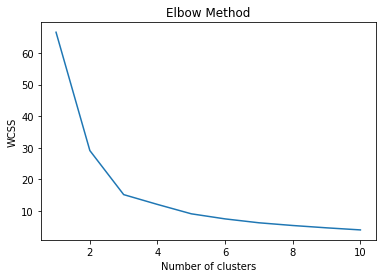

In [56]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(principalComponents[:,:2])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

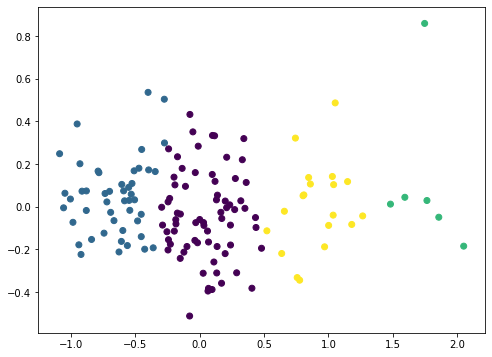

In [57]:
# kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(principalComponents[:,:2])
model = KMeans(n_clusters=4).fit(principalComponents[:,:2])

# Visualize it:
plt.figure(figsize=(8, 6))
plt.scatter(principalComponents[:,0], principalComponents[:,1], c=model.labels_.astype(float))
# df['Cluster'] = pred_y
# plt.figure(figsize=(20,10))
# # plt.scatter(np.array(df.iloc[:,0]), np.array(df.iloc[:,1]), s=30, c='blue')
# plt.scatter(principalComponents[:,0], principalComponents[:,1], s=10, c='red')

In [58]:
res['club'] = list(res.index)
res['league'] = list(res['club'].apply(lambda x:teams_leagues[x]))
res['pc1'] = list(principalComponents[:,0])
res['pc2'] = list(principalComponents[:,2])
res['cluster'] = list(model.labels_)
res.head(10)

,attacking,defending,goalkeeping,average_age,international_reputation,mentality,movement,overall,potential,power,skill,skill_moves,value_eur,wage_eur,club,league,pc1,pc2,cluster
club,,,,,,,,,,,,,,,,,,,
1. FC Köln,53.134146,49.713415,18.115854,24.371951,1.304878,53.896341,65.115854,71.176829,76.548780,61.426829,54.274390,2.414634,4.310396e+06,17335.365854,1. FC Köln,Bundesliga,0.065325,-0.194305,0
1. FC Nürnberg,50.434524,45.404762,16.309524,24.547619,1.125000,50.214286,64.476190,67.714286,73.029762,60.863095,52.196429,2.410714,1.488363e+06,7220.238095,1. FC Nürnberg,Bundesliga,-0.480878,0.124590,1
1. FC Union Berlin,51.382353,45.158824,16.217647,25.129412,1.070588,51.064706,64.317647,67.088235,71.823529,61.000000,52.894118,2.341176,1.298853e+06,10341.176471,1. FC Union Berlin,Bundesliga,-0.504204,0.036569,1
1. FSV Mainz 05,54.069149,48.462766,17.047872,23.867021,1.164894,54.239362,67.207447,70.781915,76.819149,61.930851,56.287234,2.425532,3.533404e+06,15611.702128,1. FSV Mainz 05,Bundesliga,0.111210,0.091784,0
AS Monaco,54.726316,48.678947,17.400000,23.331579,1.573684,54.621053,66.184211,72.573684,79.931579,61.868421,56.836842,2.542105,6.621000e+06,27810.526316,AS Monaco,Ligue 1,0.406270,0.131337,0
AS Nancy Lorraine,48.453416,45.913043,15.801242,25.099379,1.105590,48.993789,63.149068,65.434783,70.677019,57.689441,49.236025,2.167702,7.576087e+05,3149.068323,AS Nancy Lorraine,Ligue 1,-0.912328,0.084571,1
AS Saint-Étienne,55.622222,52.300000,16.444444,24.622222,1.361111,55.616667,65.188889,70.650000,75.761111,63.011111,56.933333,2.400000,3.748806e+06,16572.222222,AS Saint-Étienne,Ligue 1,0.199340,-0.034396,0
Amiens SC,51.483607,45.188525,15.762295,25.098361,1.081967,51.327869,62.836066,66.655738,71.475410,59.713115,53.967213,2.434426,2.269959e+06,8754.098361,Amiens SC,Ligue 1,-0.524334,0.089463,1
Angers SCO,52.022346,47.173184,15.938547,25.675978,1.100559,51.938547,62.268156,67.905028,71.597765,59.938547,53.240223,2.301676,2.110978e+06,9178.770950,Angers SCO,Ligue 1,-0.507906,-0.090058,1


In [59]:
res.columns.values

array(['attacking', 'defending', 'goalkeeping', 'average_age',
       'international_reputation', 'mentality', 'movement', 'overall',
       'potential', 'power', 'skill', 'skill_moves', 'value_eur',
       'wage_eur', 'club', 'league', 'pc1', 'pc2', 'cluster'],
      dtype=object)

In [60]:
# res.to_csv('../FIFAData/Club_AggData.csv', index=False)
df = pd.read_csv('../FIFAData/Club_AggData.csv')
df.shape
df.dtypes

Attacking                   float64
Defending                   float64
Goalkeeping                 float64
Age                         float64
international_reputation    float64
Mentality                   float64
Movement                    float64
Overall                     float64
potential                   float64
Power                       float64
Skill                       float64
skill_moves                 float64
Value(EUR)                  float64
wage_eur                    float64
Club                         object
league                       object
pc1                         float64
pc2                         float64
cluster                       int64
dtype: object

In [61]:
df = df.drop(['pc1', 'pc2', 'cluster'], axis=1)

df.to_csv('../FIFAData/pre_PCA_data.csv', index=False)

In [62]:
cols = ['Attacking','Defending','Goalkeeping','Age','international_reputation','Mentality','Movement','Overall','potential','Power','Skill','skill_moves','Value(EUR)','wage_eur']
pca = PCA(n_components=df[cols].shape[1])
x = MinMaxScaler().fit_transform(df[cols])
principalComponents = pca.fit_transform(x)
sum(pca.explained_variance_ratio_[:2])

0.8508960277071079

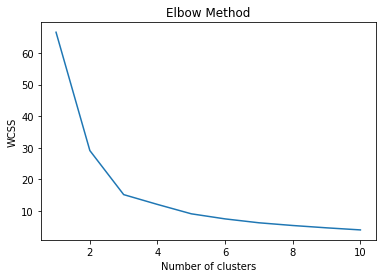

In [63]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(principalComponents[:,:2])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

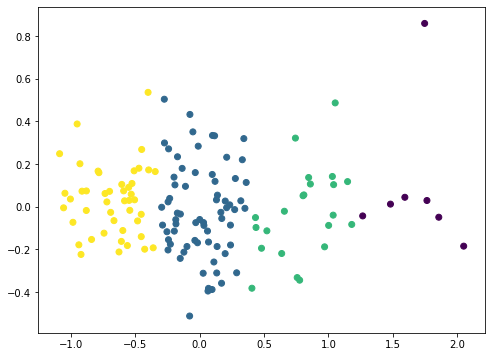

In [64]:
pred_y = kmeans.fit_predict(principalComponents[:,:2])
model = KMeans(n_clusters=4).fit(principalComponents[:,:2])

# Visualize it:
plt.figure(figsize=(8, 6))
plt.scatter(principalComponents[:,0], principalComponents[:,1], c=model.labels_.astype(float))

In [65]:
df['pc1'] = list(principalComponents[:,0])
df['pc2'] = list(principalComponents[:,2])
df['cluster'] = list(model.labels_)
df.head(10)

,Attacking,Defending,Goalkeeping,Age,international_reputation,Mentality,Movement,Overall,potential,Power,Skill,skill_moves,Value(EUR),wage_eur,Club,league,pc1,pc2,cluster
0,53.134146,49.713415,18.115854,24.371951,1.304878,53.896341,65.115854,71.176829,76.548780,61.426829,54.274390,2.414634,4.310396e+06,17335.365854,1. FC Köln,Bundesliga,0.065325,-0.194305,1
1,50.434524,45.404762,16.309524,24.547619,1.125000,50.214286,64.476190,67.714286,73.029762,60.863095,52.196429,2.410714,1.488363e+06,7220.238095,1. FC Nürnberg,Bundesliga,-0.480878,0.124590,3
2,51.382353,45.158824,16.217647,25.129412,1.070588,51.064706,64.317647,67.088235,71.823529,61.000000,52.894118,2.341176,1.298853e+06,10341.176471,1. FC Union Berlin,Bundesliga,-0.504204,0.036569,3
3,54.069149,48.462766,17.047872,23.867021,1.164894,54.239362,67.207447,70.781915,76.819149,61.930851,56.287234,2.425532,3.533404e+06,15611.702128,1. FSV Mainz 05,Bundesliga,0.111210,0.091784,1
4,54.726316,48.678947,17.400000,23.331579,1.573684,54.621053,66.184211,72.573684,79.931579,61.868421,56.836842,2.542105,6.621000e+06,27810.526316,AS Monaco,Ligue 1,0.406270,0.131337,2
5,48.453416,45.913043,15.801242,25.099379,1.105590,48.993789,63.149068,65.434783,70.677019,57.689441,49.236025,2.167702,7.576087e+05,3149.068323,AS Nancy Lorraine,Ligue 1,-0.912328,0.084571,3
6,55.622222,52.300000,16.444444,24.622222,1.361111,55.616667,65.188889,70.650000,75.761111,63.011111,56.933333,2.400000,3.748806e+06,16572.222222,AS Saint-Étienne,Ligue 1,0.199340,-0.034396,1
7,51.483607,45.188525,15.762295,25.098361,1.081967,51.327869,62.836066,66.655738,71.475410,59.713115,53.967213,2.434426,2.269959e+06,8754.098361,Amiens SC,Ligue 1,-0.524334,0.089463,3
8,52.022346,47.173184,15.938547,25.675978,1.100559,51.938547,62.268156,67.905028,71.597765,59.938547,53.240223,2.301676,2.110978e+06,9178.770950,Angers SCO,Ligue 1,-0.507906,-0.090058,3
9,57.162437,51.939086,16.025381,24.319797,2.050761,58.573604,68.695431,75.065990,81.091371,63.228426,59.548223,2.705584,1.162673e+07,62162.436548,Arsenal,Premier League,1.040308,0.262990,2
